# Add-ons: `fdesign`

## Calculating a Digital Linear Filter.

**IMPORTANT:** To design a Digital Linear Filter you need to install `empyscripts` in addition to `empymod`, as `fdesign` is an add-on and not in `empymod`. (To install `empyscripts` you just do the same as when you installed `empymod`, simply replacing `empymod` with `empyscripts` in the commands.)

This example is taken from the article. Have a look at the article repository for many more examples,  
https://github.com/empymod/article-fdesign.

In [1]:
import numpy as np               # NumPy
import matplotlib.pyplot as plt  # Matplotlib

from empymod import dipole       # Load required empymod functions
from empyscripts import fdesign  # Load required empyscripts functions

In [2]:
# Plot-style adjustments
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

In [3]:
inp = {'r': np.logspace(0, 10, 1000),
       'r_def': (1, 1, 2),
       'n': 201,
       'name': 'test',
       'full_output': True,
       'fI': (fdesign.j0_1(5), fdesign.j1_1(5))}

## 1. Rough overview over a wide range

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 1.67412e-14
   > Spacing       : 0.07333333333
   > Shift         : -2.222222222
   > Base min/max  : 7.080680e-05 / 1.658545e+02

:: empymod END; runtime = 0:00:03.773195 :: 

* QC: Overview of brute-force inversion:


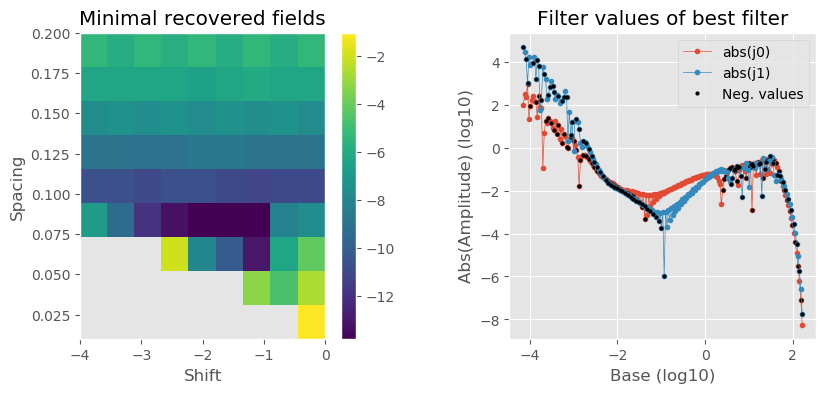

In [4]:
filt1, out1 = fdesign.design(spacing=(0.01, 0.2, 10), shift=(-4, 0, 10), save=False, **inp)

## 2. First focus

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 1.9938e-16
   > Spacing       : 0.06
   > Shift         : -1.333333333
   > Base min/max  : 6.533920e-04 / 1.063427e+02

:: empymod END; runtime = 0:00:02.751509 :: 

* QC: Overview of brute-force inversion:


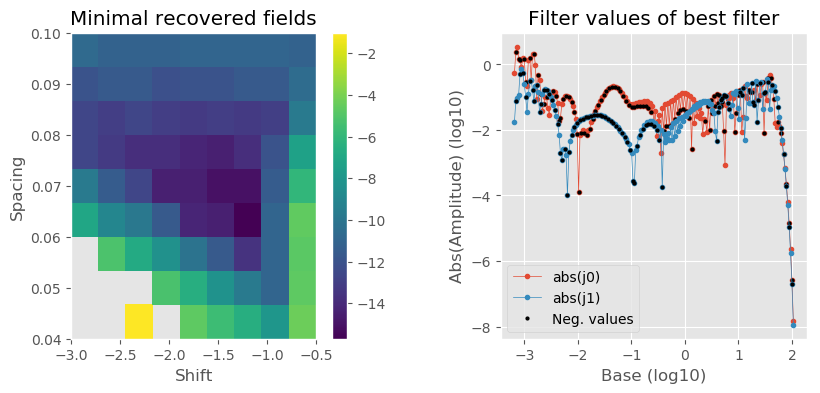

In [5]:
filt2, out2 = fdesign.design(spacing=(0.04, 0.1, 10), shift=(-3, -0.5, 10), save=False, **inp)

## 3. Final focus

   brute fct calls : 100    

   Filter length   : 201
   Best filter
   > Min field     : 1.98887e-16
   > Spacing       : 0.06166666667
   > Shift         : -1.483333333
   > Base min/max  : 4.760441e-04 / 1.081299e+02

:: empymod END; runtime = 0:00:02.214472 :: 

* QC: Overview of brute-force inversion:


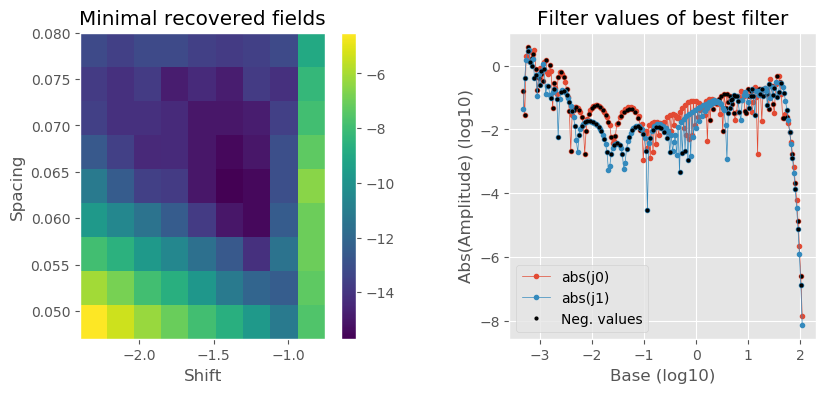

In [6]:
filt, out = fdesign.design(spacing=(0.047, 0.08, 10), shift=(-2.4, -0.75, 10), finish=False, save=False, **inp)

In [7]:
## To reproduce exactil the same filter as wer_201_2018:
# filt_orig, out_orig = fdesign.load_filter('wer201', True)
# fdesign.plot_result(filt_orig, out_orig)
# filt_orig, out_orig = fdesign.design(spacing=out_orig[0][0], shift=out_orig[0][1], **inp)

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


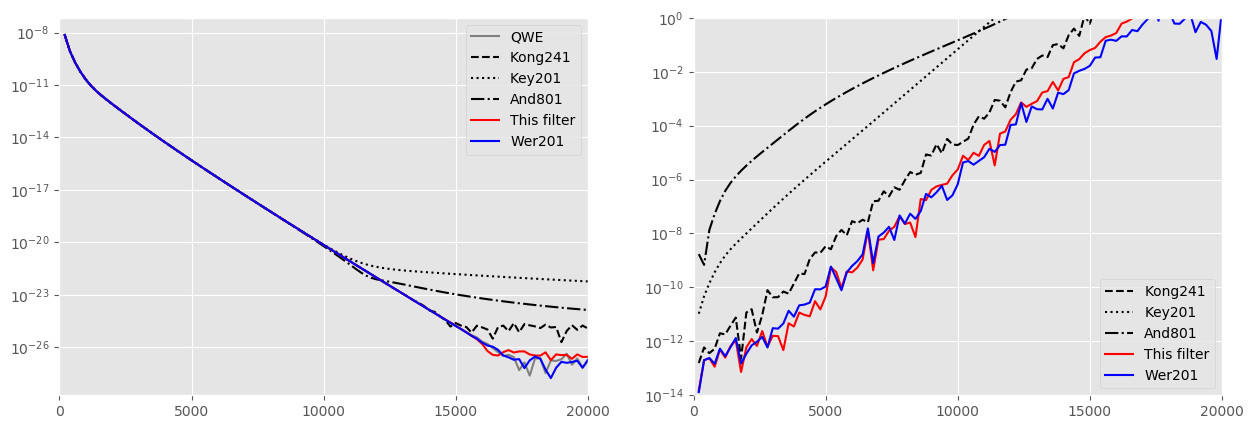

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


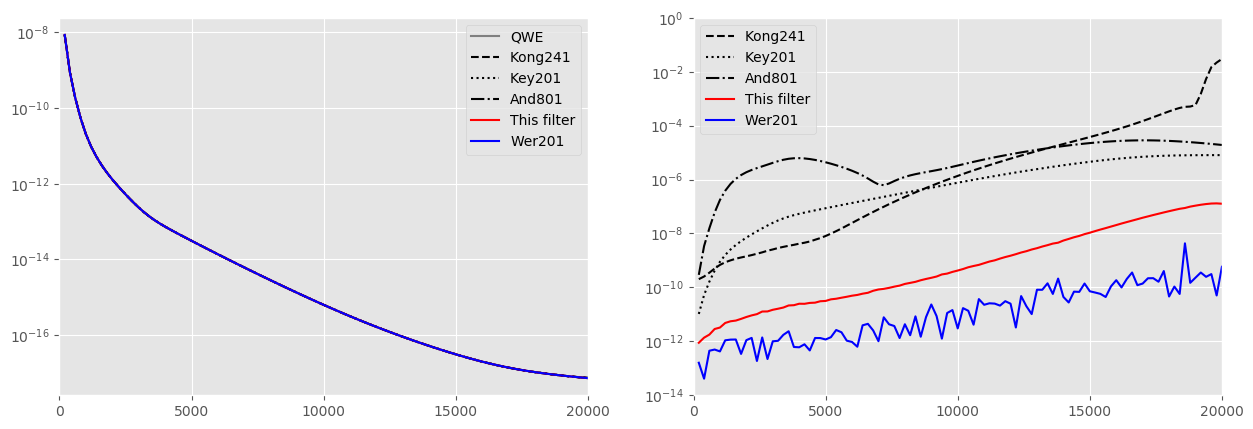

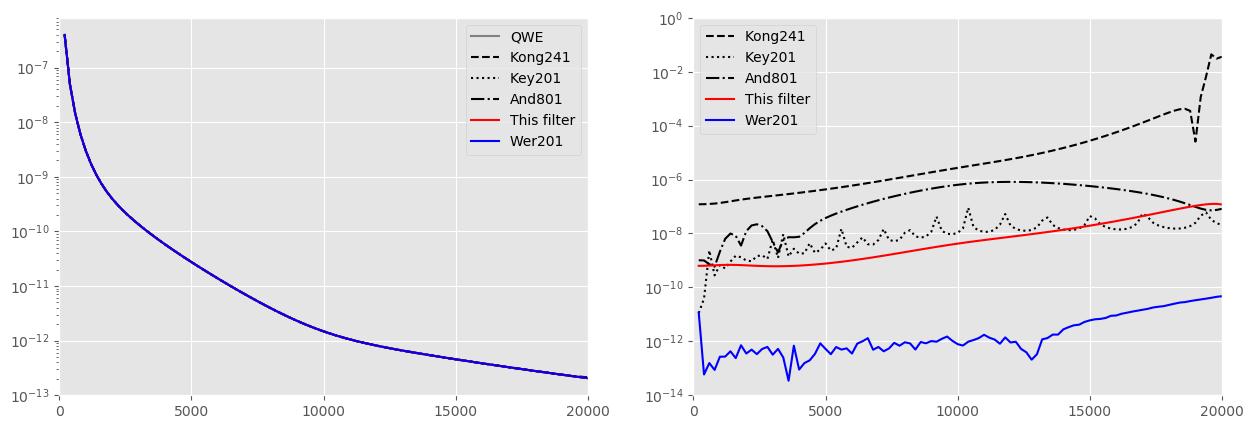

In [8]:
def plotresult(depth, res, zsrc, zrec):
    x = np.arange(1, 101)*200
    inp = {
        'src': [0, 0, depth[1]-zsrc],
        'rec': [x, x*0, depth[1]-zrec], 
        'depth': depth,
        'res': res,
        'ab': 11,
        'freqtime': 1,
        'verb': 1,
    }
    
    kong241 = dipole(htarg='kong_241_2007', **inp)
    key201 = dipole(htarg='key_201_2012', **inp)
    and801 = dipole(htarg='anderson_801_1982', **inp)
    test = dipole(htarg=filt, **inp)
    wer201 = dipole(htarg='wer_201_2018', **inp)
    qwe = dipole(ht='qwe', **inp)
    
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.semilogy(x, np.abs(qwe), c='0.5', label='QWE')
    plt.semilogy(x, np.abs(kong241), 'k--', label='Kong241')
    plt.semilogy(x, np.abs(key201), 'k:', label='Key201')
    plt.semilogy(x, np.abs(and801), 'k-.', label='And801')
    plt.semilogy(x, np.abs(test), 'r', label='This filter')
    plt.semilogy(x, np.abs(wer201), 'b', label='Wer201')
    plt.legend()
    plt.xticks([0, 5e3, 10e3, 15e3, 20e3])
    plt.xlim([0, 20e3])
    
    plt.subplot(122)
    plt.semilogy(x, np.abs((kong241-qwe)/qwe), 'k--', label='Kong241')
    plt.semilogy(x, np.abs((key201-qwe)/qwe), 'k:', label='Key201')
    plt.semilogy(x, np.abs((and801-qwe)/qwe), 'k-.', label='And801')
    plt.semilogy(x, np.abs((test-qwe)/qwe), 'r', label='This filter')
    plt.semilogy(x, np.abs((wer201-qwe)/qwe), 'b', label='Wer201')
    plt.legend()
    plt.xticks([0, 5e3, 10e3, 15e3, 20e3])
    plt.xlim([0, 20e3])
    plt.ylim([1e-14, 1])
    
    plt.show()

plotresult([-1e50, 2000,], [2e14, 1/3.2, 1], 50, 0)  # KONG model
plotresult([0, 1000, 2000, 2100], [1/1e-12, 1/3.3, 1, 100, 1], 10, 0)  # KEY model
plotresult([0, 1, 1000, 1100], [2e14, 10, 10, 500, 10], 0.5, 0.2)  # LAND model

In [9]:
from empyscripts import versions
versions('HTML')